In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
hola = [8.9, 12.4, 8.6, 11.3, 9.2, 8.8, 35.1, 6.2, 7.0, 7.1, 11.8, 10.7, 7.6,
        9.1, 9.2, 8.2, 9.0, 8.7, 9.1, 10.9, 10.3, 9.6, 7.8, 11.5, 9.3, 7.9,
        8.8, 8.8, 12.7, 8.4, 7.8, 5.7, 10.5, 10.5, 9.6, 8.9, 10.2, 10.3,
        7.7, 10.6, 8.3, 8.8, 9.5, 8.8, 9.4]

viento = pd.DataFrame(hola, columns=['velviento']) #Create a dataframe with default index 0 to n-1
viento.head()

,velviento
0,8.9
1,12.4
2,8.6
3,11.3
4,9.2


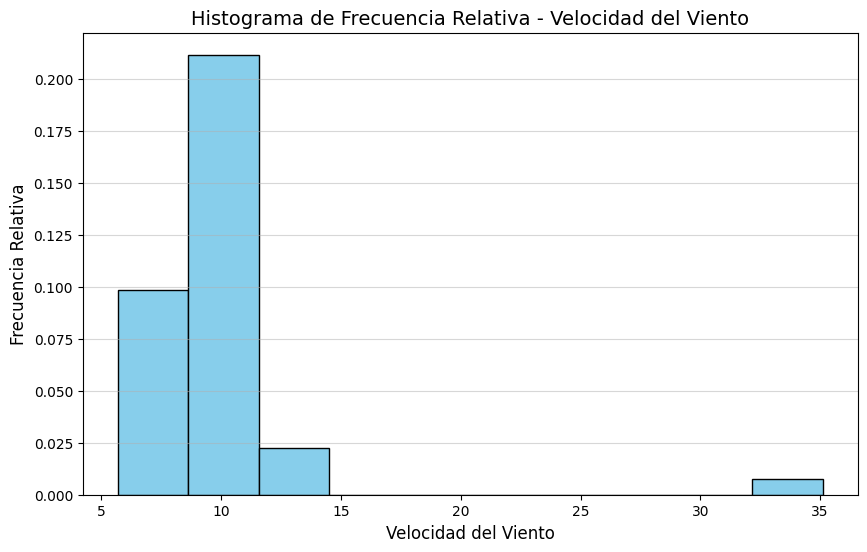

In [ ]:
#Construya un histograma de frecuecia relativa para estos datos.


#Creamos el histograma de frecuencia relativa (density=True normaliza las frecuencias).
plt.figure(figsize=(10,6))
plt.hist(viento['velviento'], bins=10, edgecolor='black', color='skyblue',
         density=True)
plt.title('Histograma de Frecuencia Relativa - Velocidad del Viento', fontsize=14)
plt.xlabel('Velocidad del Viento', fontsize=12)
plt.ylabel('Frecuencia Relativa', fontsize=12)
plt.grid(axis='y', alpha=0.5)

plt.show()

El valor 35.1 se registró en Mt. Washington, New Hampshire. ¿La geografía de esa ciudad explica la magnitud promedio de la velocidad de sus vientos?

La geografia de Mt. Washington (New Hampshire) es peculiar con alta altitud y condiciones extremas, podria ser una  de las explicaciones de la alta velocidad de sus vientos.

 El promedio de velocidad de vientos en Chicago es 10.3 millas por hora. ¿Qué porcentaje de las ciudades tienen promedios de velocidad de vientos mayores que Chicago?

In [ ]:
mb = viento['velviento'] > 10.3 #Filtramos los valores mayores a 10.3
porcmayorchicago = round((len(viento[mb]) / len(viento)) *100, 2)
print('El porcentaje de ciudades con vientos mayores a 10.3 millas por hora es: ', porcmayorchicago)

El porcentaje de ciudades con vientos mayores a 10.3 millas por hora es:  24.44


¿Piensa usted que Chicago tiene vientos inusuales?

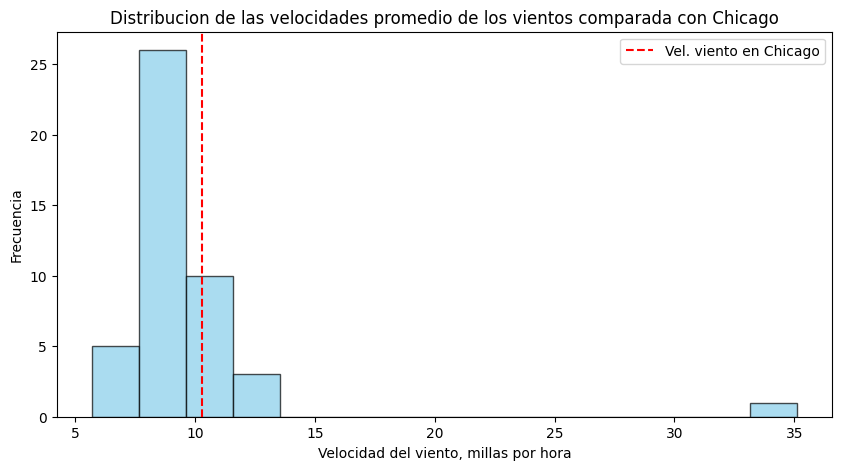

In [ ]:
#Para responder creemos una representacion visual de los datos:

plt.figure(figsize=(10,5))
plt.hist(viento['velviento'], bins=15, color='skyblue', edgecolor='black',
         alpha=0.7)
plt.axvline(10.3, color='red', linestyle='--', label=f'Vel. viento en Chicago')
plt.xlabel('Velocidad del viento, millas por hora')
plt.ylabel('Frecuencia')
plt.title('Distribucion de las velocidades promedio de los vientos comparada con Chicago')
plt.legend()
plt.show()

Hciendo uso de nuestra visualizacion de las distribuciones de las velocidads proemdio de los vientos comparadas con Chicago, ademas de que sabemos que esta cuidad tiene una velocidad de viento mayor al 75.56 % de las demas ciudades podemos concluir que la velocidad del viento en Chicago si es algo inusual.

# **2**
De gran importancia para residentes de la región central de Florida es la cantidad de material radiactivo presente en el suelo de zonas recuperadas de la explotación minera de fosfatos. Las mediciones de la cantidad de $^{238}$U en 25 muestras de suelo son las siguientes:

 .74 6.47 1.90 2.69 .75
 .32 9.99 1.77 2.41 1.96
 1.66 .70 2.42 .54 3.36
 3.59 .37 1.09 8.32 4.06
 4.55 .76 2.03 5.70 12.48


 Construya un histograma de frecuencia relativa para estos datos.

In [ ]:
suelo = [0.74, 6.47, 1.90, 2.69, 0.75, 0.32, 9.99, 1.77, 2.41, 1.96, 1.66,
         0.70, 2.42, 0.54, 3.36, 3.59, 0.37, 1.09, 8.32, 4.06,
         4.55, 0.76, 2.03, 5.70, 12.48]

muestras = pd.DataFrame(suelo, columns = ['238U'])
muestras.head()

,238U
0,0.74
1,6.47
2,1.90
3,2.69
4,0.75


In [ ]:
#Calculamos el ancho de los bins usando la regla de Freedman-Diaconis:

q25, q75 = np.percentile(muestras, [25, 75])
iqr = q75-q25
n = len(muestras)
anchobin = 2*iqr/(n**(1/3))
numbins= int((muestras['238U'].max()-muestras['238U'].min())/anchobin)

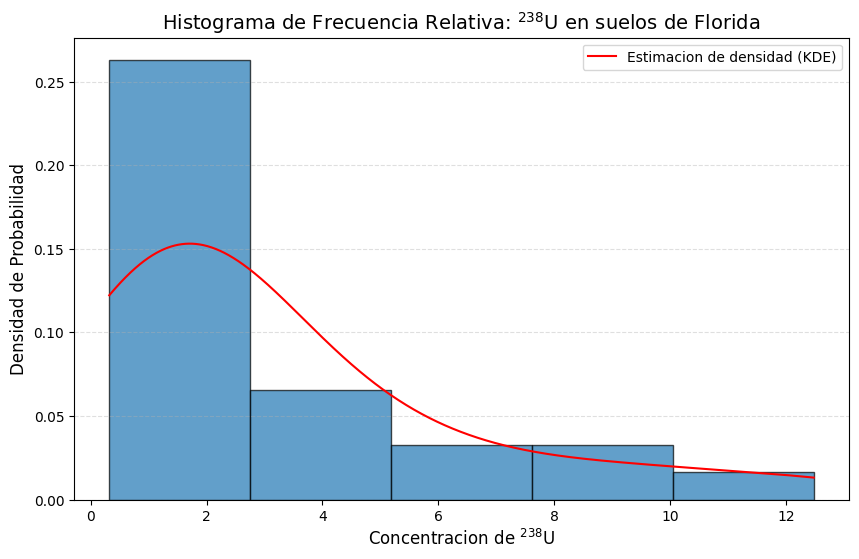

In [ ]:
#Histograma de Frecuencia Relativa:

plt.figure(figsize=(10,6))
plt.hist(muestras['238U'], bins=numbins, edgecolor='black', color='#1f77b4',
         density=True, alpha=0.7)
plt.title('Histograma de Frecuencia Relativa: $^{238}$U en suelos de Florida',
          fontsize=14)
plt.xlabel('Concentracion de $^{238}$U', fontsize=12)
plt.ylabel('Densidad de Probabilidad', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

#Linea de densidad:
from scipy.stats import gaussian_kde
kde= gaussian_kde(muestras['238U'])
valx = np.linspace(muestras['238U'].min(), muestras['238U'].max(), 1000)
plt.plot(valx, kde(valx), color='red', label='Estimacion de densidad (KDE)')

plt.legend()
plt.show()

Podemos observar que los datos estan sesgados a la izquierda, la mayoria de los datos estan entre 0 y 4 y pocos valores extremos.

El pico principal esta entre 0.5 y 2, lo que nos indica que la mayoria de las muestras tiene bajas concentraciones.

# **3**

Las 40 acciones principales del mercado secundario (OTC, por sus siglas en inglés), clasifi cadas por el porcentaje de acciones en circulación vendidas en un día el año pasado son como sigue:

 11.88 6.27 5.49 4.81 4.40 3.78 3.44 3.11 2.88 2.68
 7.99 6.07 5.26 4.79 4.05 3.69 3.36 3.03 2.74 2.63
 7.15 5.98 5.07 4.55 3.94 3.62 3.26 2.99 2.74 2.62
 7.13 5.91 4.94 4.43 3.93 3.48 3.20 2.89 2.69 2.61

Construya un histograma de frecuencia relativa para describir estos datos.

In [33]:
ot = [11.88, 6.27, 5.49, 4.81, 4.40, 3.78, 3.44, 3.11, 2.88, 2.68, 7.99,
       6.07, 5.26, 4.79, 4.05, 3.69, 3.36, 3.03, 2.74, 2.63, 7.15, 5.98,
       5.07, 4.55, 3.94, 3.62, 3.26, 2.99, 2.74, 2.62, 7.13, 5.91, 4.94,
       4.43, 3.93, 3.48, 3.20, 2.89, 2.69, 2.61]

otc = pd.DataFrame(ot, columns=['porc_circulacion'])
otc.head()

,porc_circulacion
0,11.88
1,6.27
2,5.49
3,4.81
4,4.40


In [34]:
#Calculamos el numero de bins usando la regla de Sturges:

n = len(otc)
nbins = int(1+3.322*np.log10(n))

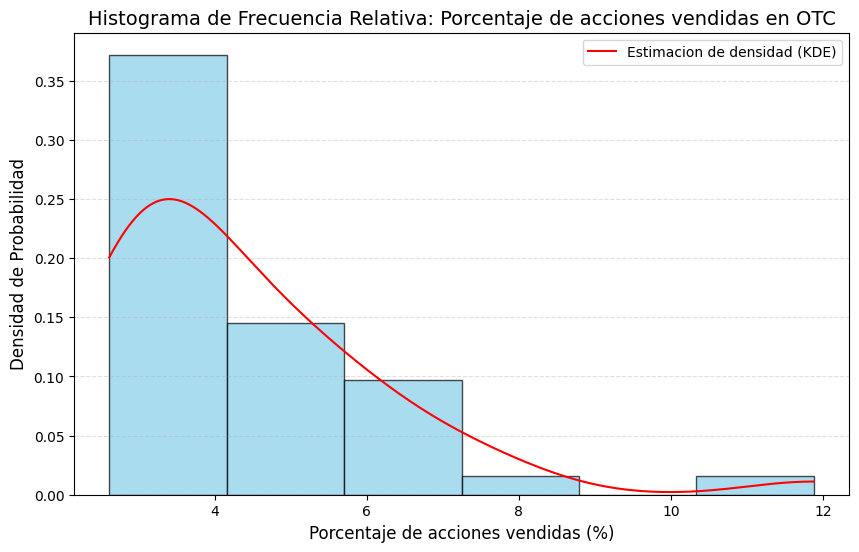

In [35]:
#Histograma de Frecuencia Relativa:

plt.figure(figsize=(10, 6))
plt.hist(otc['porc_circulacion'], bins = nbins, edgecolor='black',
         color='skyblue', density=True, alpha=0.7)
plt.title('Histograma de Frecuencia Relativa: Porcentaje de acciones vendidas en OTC', fontsize=14)
plt.xlabel('Porcentaje de acciones vendidas (%)', fontsize=12)
plt.ylabel('Densidad de Probabilidad', fontsize=12)
plt.grid(axis ='y', linestyle='--', alpha=0.4)

#Linea de densidad:

from scipy.stats import gaussian_kde
kde=gaussian_kde(otc['porc_circulacion'])
valx = np.linspace(otc['porc_circulacion'].min(),
                   otc['porc_circulacion'].max(), 1000)
plt.plot(valx, kde(valx), color='red', label='Estimacion de densidad (KDE)')

plt.legend()
plt.show()

Los datos estan sesgados a la izquierda con la mayoria de los valores concentrados entre 2.6 y 7 y un valor inusual en 11.8.

El pico principal se encuentra entre el 2 % y 4 %; la mayoria de las acciones tiene un porcentaje de venta moderado.

El valor en 11.88% podria indicarnos una accion con alta liquidez o un evento particular ocurrido referente a esta accion.

**¿Qué proporción de estas 40 acciones principales vendió más de 4% de las acciones en circulación?**

In [36]:
mb = otc['porc_circulacion'] > 4 #Filtramos los valores mayores a 4.
otc4 = len(otc[mb])
total = len(otc)
proporcion = otc4/total
print('La proporcion de acciones que vendio mas del 4% de las acciones en circulacion es: ',
      proporcion, 'o', proporcion*100,'%')

La proporcion de acciones que vendio mas del 4% de las acciones en circulacion es:  0.45 o 45.0 %


**Si una de las acciones se selecciona al azar de las 40 para las que se tomaron los datos precedentes, ¿cuál es la probabilidad de que venda menos de 5% de sus acciones en circulación?**

In [37]:
mb1 = otc['porc_circulacion'] < 5
menorcinco = len(otc[mb1])
probacinco = menorcinco/total
print('La probabilidad de seleecionar al azar una accion que venda menos del 5 % en sus acciones en circulacion es: ',
      probacinco)

La probabilidad de seleecionar al azar una accion que venda menos del 5 % en sus acciones en circulacion es:  0.725


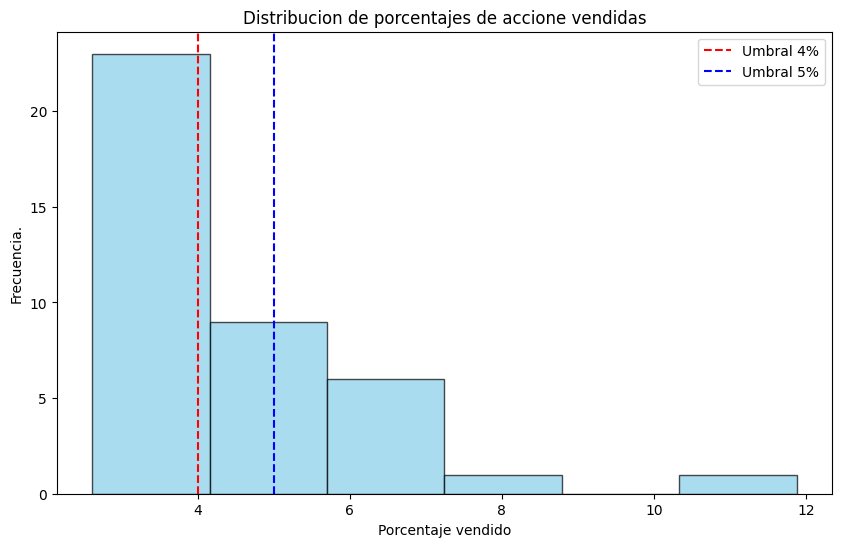

In [38]:
plt.figure(figsize=(10,6))
plt.hist(otc['porc_circulacion'], bins= nbins, edgecolor='black',
         color='skyblue', alpha=0.7)
plt.axvline(x=4, color='red', linestyle='--', label='Umbral 4%')
plt.axvline(x=5, color='blue', linestyle='--', label='Umbral 5%')
plt.title('Distribucion de porcentajes de accione vendidas')
plt.xlabel('Porcentaje vendido')
plt.ylabel('Frecuencia.')
plt.legend()
plt.show()

# **4**

Un artículo en Archaeometry presentó un análisis de 26 muestras de cerámica romano-británica hallada en cuatro hornos en sitios diferentes del Reino Unido. El porcentaje de óxido de aluminio en cada una de las 26 muestras aparece a continuación:

 Llanederyn,     Caldicot,      IslandThorns,         AshleyRails

14.4  11.6,           11.8,            18.3,            17.7

13.8  11.1,           11.6,            15.8,            18.3

14.6  13.4,           18.0,            16.7

11.5  12.4,           18.0,            14.8

13.8  13.1,           20.8,            19.1

10.9  12.7

10.1  12.5

In [2]:
ficc = {'Horno': ['Llanederyn', 'Llanederyn', 'Llanederyn', 'Llanederyn',
                  'Llanederyn', 'Llanederyn', 'Llanederyn', 'Llanederyn',
                  'Llanederyn', 'Llanederyn', 'Llanederyn', 'Llanederyn',
                  'Llanederyn', 'Llanederyn', 'Caldicot', 'Caldicot',
                  'IslandThorns', 'IslandThorns', 'IslandThorns',
                  'IslandThorns', 'IslandThorns', 'AshleyRails',
                  'AshleyRails', 'AshleyRails', 'AshleyRails',
                  'AshleyRails'],
    'AI2O3': [14.4, 11.6, 13.8, 11.1, 14.6, 13.4, 11.5, 12.4, 13.8, 13.1,
                      10.9, 12.7, 10.1, 12.5, 11.8, 11.6, 11.8, 15.8, 18.0,
               18.0, 20.8, 17.7, 18.3, 16.7, 14.8, 19.1]}

cera = pd.DataFrame(ficc)
cera

,Horno,AI2O3
0,Llanederyn,14.4
1,Llanederyn,11.6
2,Llanederyn,13.8
3,Llanederyn,11.1
4,Llanederyn,14.6
5,Llanederyn,13.4
6,Llanederyn,11.5
7,Llanederyn,12.4
8,Llanederyn,13.8
9,Llanederyn,13.1


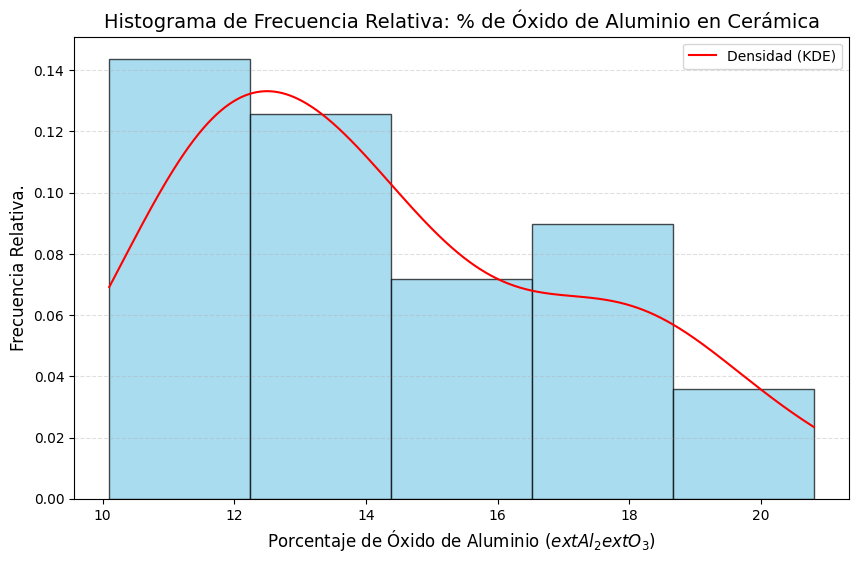

In [3]:
#Usamos la regla de Sturges para obtener el numero de bins:
n = len(cera)
binsn = int(1+3.22*np.log10(n))

#Histograma de Frecuencia Reltiva:

plt.figure(figsize=(10,6))
plt.hist(cera['AI2O3'], bins=binsn, edgecolor='black',
         color = 'skyblue', density =True, alpha=0.7)
plt.title('Histograma de Frecuencia Relativa: % de Óxido de Aluminio en Cerámica', fontsize=14)
plt.xlabel('Porcentaje de Óxido de Aluminio ($\text{Al}_2\text{O}_3$)', fontsize=12)
plt.ylabel('Frecuencia Relativa.', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

#Linea de densidad:
from scipy.stats import gaussian_kde
kde=gaussian_kde(cera['AI2O3'])
xval = np.linspace(cera['AI2O3'].min(), cera['AI2O3'].max(), 1000)
plt.plot(xval, kde(xval), color='red', label='Densidad (KDE)')
plt.legend()
plt.show()

Observamos un sesgo a la izquierda, la mayoria de los datos se encurntran entre 10% y 14%

/tmp/ipython-input-22-1338257884.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=cera, x='Horno', y='AI2O3', palette='muted')


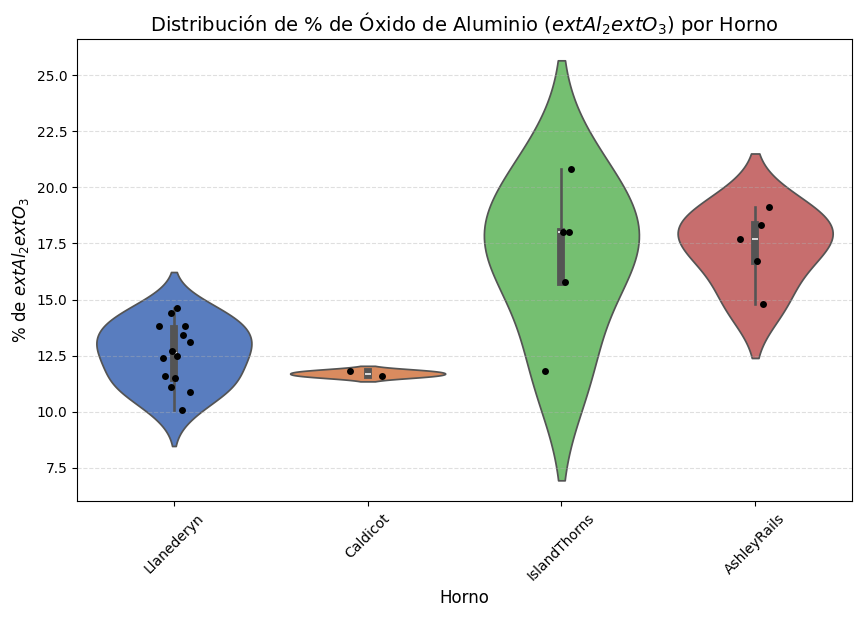

In [22]:
#Grafico de violin:

plt.figure(figsize=(10,6))
sns.violinplot(data=cera, x='Horno', y='AI2O3', palette='muted')
sns.stripplot(data=cera, x='Horno', y='AI2O3', jitter=True, color='black')
plt.title('Distribución de % de Óxido de Aluminio ($\text{Al}_2\text{O}_3$) por Horno',
          fontsize=14)
plt.xlabel('Horno', fontsize=12)
plt.ylabel('% de $\text{Al}_2\text{O}_3$', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.xticks(rotation=45)
plt.show()

El ancho representa la densidad de probabilidad de los datos. Áreas más anchas indican mayor concentración de muestras en ese rango de valores.

<Axes: xlabel='AI2O3', ylabel='Density'>

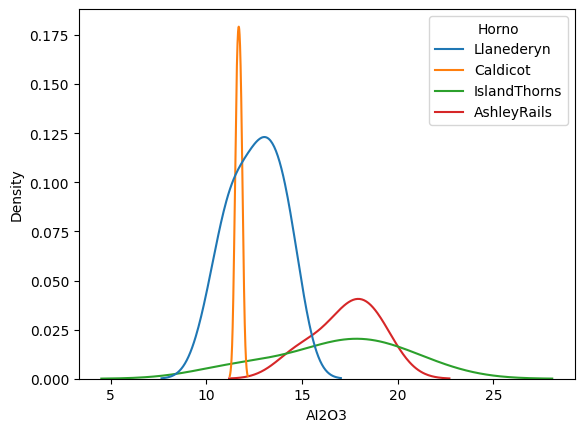

In [24]:
sns.kdeplot(data=cera, x='AI2O3', hue='Horno')

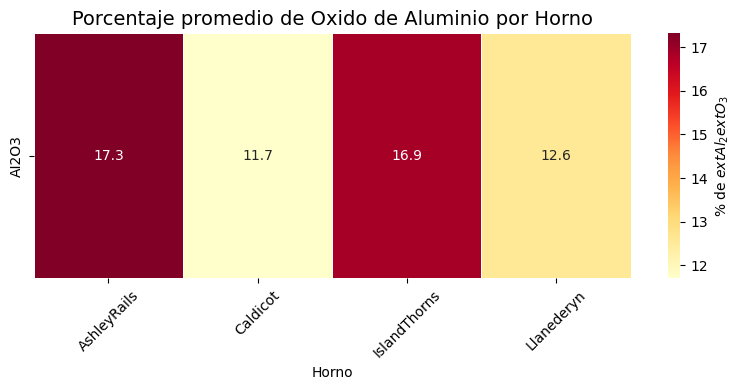

In [29]:
#Calculamos el promedio por Horno:
heatmap_data=cera.groupby('Horno')['AI2O3'].mean().reset_index()
heatmap_pivot=heatmap_data.pivot_table(columns='Horno', values='AI2O3')


plt.figure(figsize=(8, 4))
sns.heatmap(
    heatmap_pivot,
    annot=True,            # Muestra los valores en las celdas
    fmt=".1f",            # Formato de 1 decimal
    cmap="YlOrRd",        # Mapa de colores (amarillo-naranja-rojo)
    linewidths=0.5,       # Líneas divisorias
    cbar_kws={'label': '% de $\text{Al}_2\text{O}_3$'}  # Barra de color
)


plt.title('Porcentaje promedio de Oxido de Aluminio por Horno', fontsize=14)
plt.xlabel('Horno')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

¿Qué característica poco común observa el lector en este histograma? Al ver los datos, ¿puede dar una explicación de esta característica poco común?


Podemos ver que el histograma presenta una distribucion **bimodal**. Esto nos podria indicar que los datos no siguen una distribucion normal unimodal, sino que parecen agruparse en dos subpoblaciones distintas.

Esta bimodalidad podria reflejar diferencias en la composicion de la ceramica vinculado a los recursos o tecnologias distintas.